In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [0]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [0]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('drive/My Drive/data/data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('drive/My Drive/data/data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [0]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

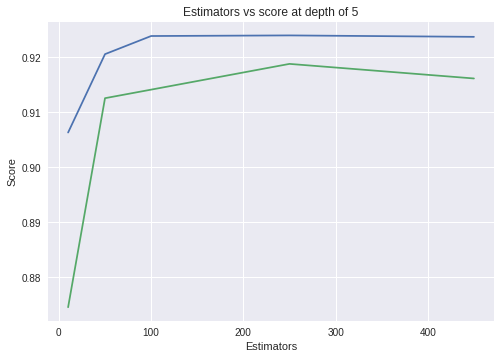

In [0]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


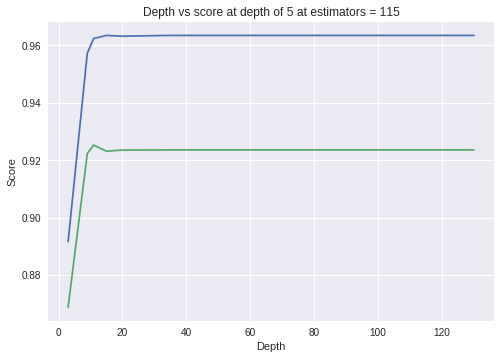

In [0]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [0]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [0]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [0]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [0]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [0]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


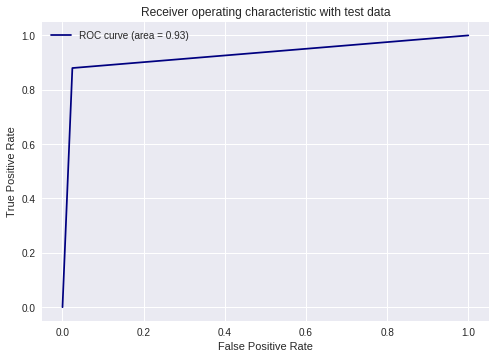

In [0]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

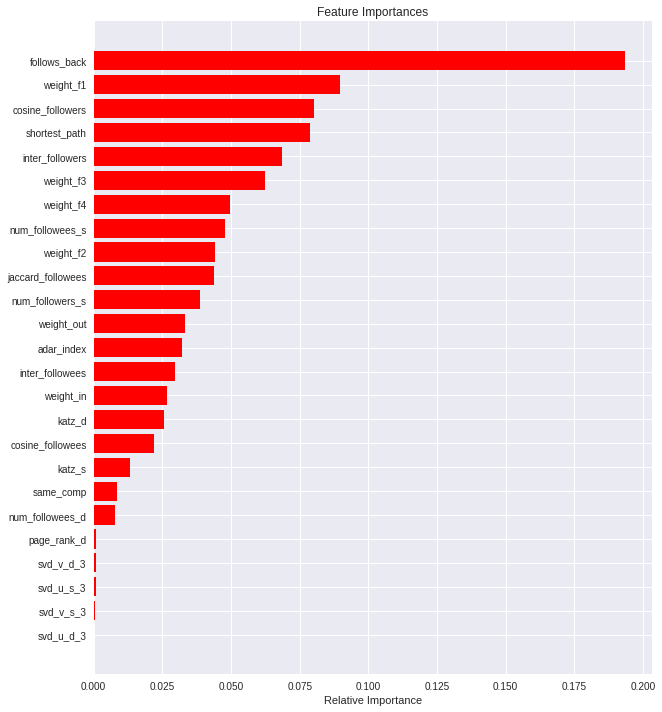

In [0]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#  Adding another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>


__Users with many friends tend to create more connections in the future. This is due to the fact that in some social networks, like in finance, the rich get richer. We estimate how ”rich” our two vertices are by calculating the multiplication between the number of friends (|Γ(x)|) or followers each vertex has. It may be noted that the similarity index does not require any node neighbor information; therefore, this similarity index has the lowest computational complexity. __

![alt text](http://be.amazd.com/link-prediction/index_files/images/pref-attach.png)

![alt text](http://be.amazd.com/link-prediction/index_files/images/pref-attach-grph.png)

In [0]:

def pref_attach_followers(a,b):
  
    try:
    
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
      
          return 0
    
        similarity = (len(set(train_graph.predecessors(a))*(set(train_graph.predecessors(b)))))
    
        return similarity
  
    except:
    
        return 0

In [0]:


# Defining Helper function w.r.t followees

def pref_attach_followees(a,b):

    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
          
            return 0
          
        similarity = (len(set(train_graph.successors(a))))*(len(set(train_graph.successors(b))))
        
        return  similarity
  
    except:
    
       return 0





In [0]:
pref_attach_followees(1,2463)

0

In [0]:
df_final_train['preferential_attachment_followers'] = df_final_train.apply(lambda x:
                                            pref_attach_followers(x['source_node'],x['destination_node']),axis=1)
df_final_test['preferential_attachment_followers'] = df_final_test.apply(lambda x:
                                            pref_attach_followers(x['source_node'],x['destination_node']),axis=1)


df_final_train['preferential_attachment_followees'] = df_final_train.apply(lambda x:
                                            pref_attach_followees(x['source_node'],x['destination_node']),axis=1)
df_final_test['preferential_attachment_followees'] = df_final_test.apply(lambda x:
                                            pref_attach_followees(x['source_node'],x['destination_node']),axis=1)

In [0]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_attachment_followers,preferential_attachment_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,0
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0,0
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0


In [0]:
df_final_train["preferential_attachment_followees"].value_counts()

0    100002
Name: preferential_attachment_followees, dtype: int64

In [0]:
df_final_train["preferential_attachment_followers"].value_counts()

0    100002
Name: preferential_attachment_followers, dtype: int64

so why???

because there isn't any meta information

# Adding  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>


In [0]:
df_final_train['svd_u_1_dot'] = df_final_train['svd_u_s_1']*(df_final_train['svd_u_d_1'])
df_final_test['svd_u_1_dot'] = df_final_test['svd_u_s_1']*(df_final_test['svd_u_d_1'])
df_final_train['svd_v_1_dot'] = df_final_train['svd_v_s_1']*(df_final_train['svd_v_d_1'])
df_final_test['svd_v_1_dot'] = df_final_test['svd_v_s_1']*(df_final_test['svd_v_d_1'])


df_final_train['svd_u_2_dot'] = df_final_train['svd_u_s_2']*(df_final_train['svd_u_d_2'])
df_final_test['svd_u_2_dot'] = df_final_test['svd_u_s_2']*(df_final_test['svd_u_d_2'])
df_final_train['svd_v_2_dot'] = df_final_train['svd_v_s_2']*(df_final_train['svd_v_d_2'])
df_final_test['svd_v_2_dot'] = df_final_test['svd_v_s_2']*(df_final_test['svd_v_d_2'])


df_final_train['svd_u_3_dot'] = df_final_train['svd_u_s_3']*(df_final_train['svd_u_d_3'])
df_final_test['svd_u_3_dot'] = df_final_test['svd_u_s_3']*(df_final_test['svd_u_d_3'])
df_final_train['svd_v_3_dot'] = df_final_train['svd_v_s_3']*(df_final_train['svd_v_d_3'])
df_final_test['svd_v_3_dot'] = df_final_test['svd_v_s_3']*(df_final_test['svd_v_d_3'])


df_final_train['svd_u_4_dot'] = df_final_train['svd_u_s_4']*(df_final_train['svd_u_d_4'])
df_final_test['svd_u_4_dot'] = df_final_test['svd_u_s_4']*(df_final_test['svd_u_d_4'])
df_final_train['svd_v_4_dot'] = df_final_train['svd_v_s_4']*(df_final_train['svd_v_d_4'])
df_final_test['svd_v_4_dot'] = df_final_test['svd_v_s_4']*(df_final_test['svd_v_d_4'])


df_final_train['svd_u_5_dot'] = df_final_train['svd_u_s_5']*(df_final_train['svd_u_d_5'])
df_final_test['svd_u_5_dot'] = df_final_test['svd_u_s_5']*(df_final_test['svd_u_d_5'])
df_final_train['svd_v_5_dot'] = df_final_train['svd_v_s_5']*(df_final_train['svd_v_d_5'])
df_final_test['svd_v_5_dot'] = df_final_test['svd_v_s_5']*(df_final_test['svd_v_d_5'])


df_final_train['svd_u_6_dot'] = df_final_train['svd_u_s_6']*(df_final_train['svd_u_d_6'])
df_final_test['svd_u_6_dot'] = df_final_test['svd_u_s_6']*(df_final_test['svd_u_d_6'])
df_final_train['svd_v_6_dot'] = df_final_train['svd_v_s_6']*(df_final_train['svd_v_d_6'])
df_final_test['svd_v_6_dot'] = df_final_test['svd_v_s_6']*(df_final_test['svd_v_d_6'])

In [0]:
df_final_train.shape

(100002, 68)

In [0]:
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_u_2_dot,svd_v_2_dot,svd_u_3_dot,svd_v_3_dot,svd_u_4_dot,svd_v_4_dot,svd_u_5_dot,svd_v_5_dot,svd_u_6_dot,svd_v_6_dot
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,2.490079e-25,1.835514e-25,1.114958e-11,2.238775e-12,7.961319e-25,1.022307e-26,5.587203e-25,7.922813e-25,1.283580e-23,7.153535e-28
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,1.689511e-20,5.429509e-21,6.774508e-20,1.941063e-20,3.192812e-03,9.068719e-04,2.477266e-22,9.657935e-23,1.253154e-18,5.343156e-19
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,7.011467e-37,2.092514e-38,2.894193e-37,4.410859e-38,2.929450e-36,4.143833e-37,2.583314e-37,3.161578e-38,9.238392e-37,8.657303e-38
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,5.825985e-24,1.798554e-23,4.650022e-20,3.158679e-18,1.705371e-25,1.453397e-23,5.949183e-22,4.611652e-22,7.671366e-30,5.607249e-26
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,2.728218e-26,0.000000e+00,7.773952e-14,0.000000e+00,3.146677e-27,0.000000e+00,1.895144e-26,0.000000e+00,6.247367e-29,0.000000e+00


In [0]:
df_final_test.shape

(50002, 68)

In [0]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_u_2_dot,svd_v_2_dot,svd_u_3_dot,svd_v_3_dot,svd_u_4_dot,svd_v_4_dot,svd_u_5_dot,svd_v_5_dot,svd_u_6_dot,svd_v_6_dot
0,848424,784690,1,0,0.0,0.029161,0.000000,14,6,9,...,1.214087e-25,1.090703e-22,8.414055e-20,2.073983e-17,7.155052e-26,6.717800e-21,9.437442e-24,1.203126e-21,1.926862e-29,9.563656e-26
1,483294,1255532,1,0,0.0,0.000000,0.000000,17,1,19,...,2.005893e-26,9.285898e-23,1.352160e-17,1.188361e-17,1.823794e-26,1.498845e-25,6.564939e-26,5.386955e-23,1.559234e-31,4.624648e-28
2,626190,1729265,1,0,0.0,0.000000,0.000000,10,16,9,...,4.317536e-24,2.212164e-24,3.671980e-13,3.904885e-12,3.992840e-25,2.900628e-25,7.296312e-25,1.083802e-25,1.320843e-26,1.627765e-27
3,947219,425228,1,0,0.0,0.000000,0.000000,37,10,34,...,2.864181e-24,3.841281e-23,1.634044e-10,9.819784e-11,6.837975e-23,3.471532e-24,9.678358e-22,4.983318e-23,3.494696e-24,1.826823e-25
4,991374,975044,1,0,0.2,0.042767,0.347833,27,15,27,...,5.768203e-25,1.189560e-24,1.246700e-11,1.300892e-11,1.947330e-22,4.952021e-25,6.377858e-22,4.558986e-24,5.809906e-27,2.332917e-26


In [0]:
df_final_train.to_csv('data_train.csv', index=True)
df_final_test.to_csv('data_test.csv', index=True)

In [0]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [0]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [0]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    plt.style.use("seaborn-darkgrid")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Tune hyperparameters for XG boost with all these features and check the error metric.

In [0]:
df_final_train_xgb = df_final_train.values
df_final_test_xgb = df_final_test.values

In [25]:
df_final_train_xgb

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         7.92281319e-25,  1.28357995e-23,  7.15353541e-28],
       [ 0.00000000e+00,  1.87134503e-01,  2.83818285e-02, ...,
         9.65793543e-23,  1.25315431e-18,  5.34315603e-19],
       [ 0.00000000e+00,  3.69565217e-01,  1.56957219e-01, ...,
         3.16157762e-38,  9.23839215e-37,  8.65730336e-38],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  4.74016575e-31,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.63233306e-30,  3.19793252e-36,  9.39284122e-36],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.89037254e-24, -6.10741276e-35,  2.07183205e-27]])

In [0]:
import xgboost as xgb
from datetime import datetime

In [0]:
import xgboost as xgb
from datetime import datetime

start = datetime.now()

param = {
        'silent': [False],
        'max_depth': [2,4,6,8,10],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3,0.5,0.75,1],
        'subsample': [0.001,0.01,0.1,0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.2,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.2,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5,0.75, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10, 100],
        'n_estimators': [1000]}



fit_params = {'eval_metric': 'logloss',
              'early_stopping_rounds': 10,
              'eval_set': [(df_final_train_xgb,y_train)]
              }

clf = xgb.XGBClassifier(nthread = 4)


model = RandomizedSearchCV(clf, param, n_iter=20,
                            n_jobs=-1, verbose=2, cv=2,
                            fit_params=fit_params,
                            scoring='f1', refit=False, random_state=42)


model.fit(df_final_train_xgb,y_train)


print('='*100)
print("Time taken to run this cell :", datetime.now() - start)
print('='*100)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:643: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=1.0, silent=False, reg_lambda=50.0, reg_alpha=10, n_estimators=1000, min_child_weight=3.0, max_depth=10, learning_rate=0.1, gamma=0.75, colsample_bytree=0.6, colsample_bylevel=1.0 
[0]	validation_0-logloss:0.612684
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.551375
[2]	validation_0-logloss:0.498229
[3]	validation_0-logloss:0.449928
[4]	validation_0-logloss:0.409288
[5]	validation_0-logloss:0.373264
[6]	validation_0-logloss:0.342644
[7]	validation_0-logloss:0.315764
[8]	validation_0-logloss:0.291243
[9]	validation_0-logloss:0.270621
[10]	validation_0-logloss:0.253265
[11]	validation_0-logloss:0.237513
[12]	validation_0-logloss:0.222665
[13]	validation_0-logloss:0.208115
[14]	validation_0-logloss:0.196251
[15]	validation_0-logloss:0.185306
[16]	validation_0-logloss:0.175449
[17]	validation_0-logloss:0.166891
[18]	validation_0-logloss:0.159571
[19]	validation_0-lo

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[0]	validation_0-logloss:0.612512
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.551492
[2]	validation_0-logloss:0.499019
[3]	validation_0-logloss:0.450484
[4]	validation_0-logloss:0.409747
[5]	validation_0-logloss:0.373565
[6]	validation_0-logloss:0.342847
[7]	validation_0-logloss:0.315813
[8]	validation_0-logloss:0.29151
[9]	validation_0-logloss:0.271076
[10]	validation_0-logloss:0.253387
[11]	validation_0-logloss:0.237922
[12]	validation_0-logloss:0.222902
[13]	validation_0-logloss:0.20843
[14]	validation_0-logloss:0.196369
[15]	validation_0-logloss:0.185678
[16]	validation_0-logloss:0.17574
[17]	validation_0-logloss:0.167214
[18]	validation_0-logloss:0.160092
[19]	validation_0-logloss:0.152249
[20]	validation_0-logloss:0.144727
[21]	validation_0-logloss:0.138565
[22]	validation_0-logloss:0.133047
[23]	validation_0-logloss:0.128109
[24]	validation_0-logloss:0.124065
[25]	validation_0-logloss:0.119607
[26]	validation_0-logloss:0.115538


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 52.7min finished


In [0]:
best_score = model.best_score_
best_params = model.best_params_

print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.9792473443300547
Best params: 
colsample_bylevel: 0.7
colsample_bytree: 0.8
gamma: 0.5
learning_rate: 0.3
max_depth: 8
min_child_weight: 1.0
n_estimators: 1000
reg_alpha: 1e-05
reg_lambda: 10.0
silent: False
subsample: 0.5


In [31]:
start = datetime.now()

clf = xgb.XGBClassifier(max_depth = 8,learning_rate=0.3,
                        min_child_weight=1.0,
                        reg_alpha = 1e-05, 
                        colsample_bytree = 0.8,colsample_bylevel = 0.7, 
                        gamma = 0.5, 
                        reg_lambda = 10, subsample = 0.5,  verbose=2, n_jobs = -1,
                        silent = False)
clf.fit(df_final_train_xgb,y_train)
predict_y = clf.predict(df_final_test_xgb)
#log_loss(y_test, predict_y, eps=1e-15)
#print("The log loss is:",log_loss(y_test, predict_y,  eps=1e-15))
pred_y_train = clf.predict(df_final_train_xgb)

print('Train f1 score',f1_score(y_train,pred_y_train))
print('Test f1 score',f1_score(y_test,predict_y))


print('='*100)
print("Time taken to run this cell :", datetime.now() - start)
print('='*100)

Train f1 score 0.9966282804230158
Test f1 score 0.9265086298290997
Time taken to run this cell : 0:00:59.296563


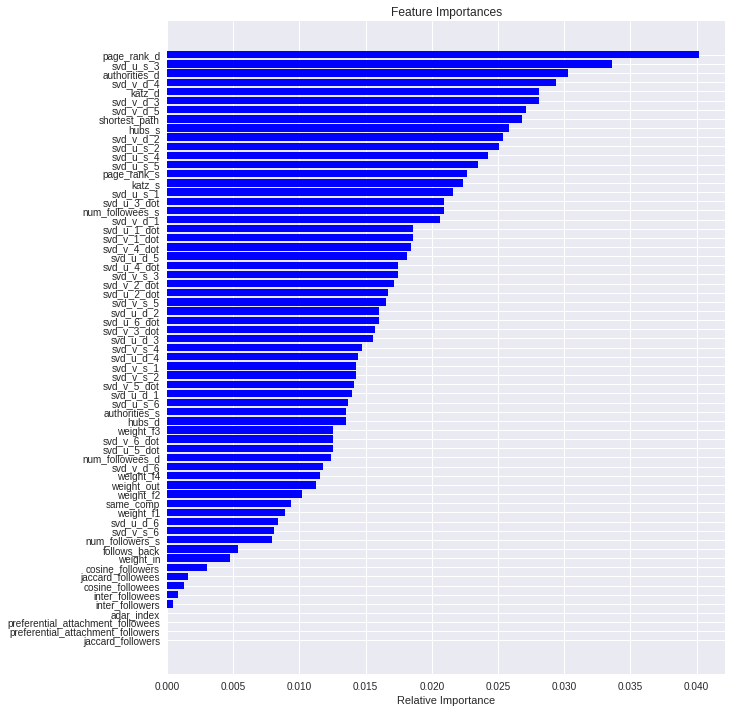

In [38]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-68:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()